# Gonum
[gonum](https://github.com/gonum) basic studies in a notebook.

In [1]:
import (
    "bytes"
    "fmt"
    "image/color"
    "math"
    "math/rand"
    
    "gonum.org/v1/gonum/mat"
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/plotutil"
    "gonum.org/v1/plot/vg"
    "gonum.org/v1/plot/vg/draw"
    "gonum.org/v1/plot/vg/vgimg"
)

## plot examples

In [2]:
func displayPlot(p *plot.Plot) {
    // Save the plot to a PNG file.
    var buf bytes.Buffer
    c, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    _ctx.Display.PNG(buf.Bytes(), nil)
}

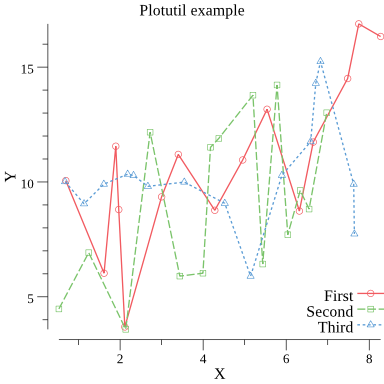

In [4]:
{
    p, err := plot.New()
    if err != nil {
        panic(err)
    }
    
    p.Title.Text = "Plotutil example"
    p.X.Label.Text = "X"
    p.Y.Label.Text = "Y"

    err = plotutil.AddLinePoints(
        p,
        "First", randomPoints(15),
        "Second", randomPoints(15),
        "Third", randomPoints(15))
    if err != nil {
        panic(err)
    }

    displayPlot(p)
}

// randomPoints returns some random x, y points.
func randomPoints(n int) plotter.XYs {
    pts := make(plotter.XYs, n)
    for i := range pts {
        if i == 0 {
            pts[i].X = rand.Float64()
        } else {
            pts[i].X = pts[i-1].X + rand.Float64()
        }
        pts[i].Y = pts[i].X + 10 * rand.Float64()
    }
    return pts
}

## Functions

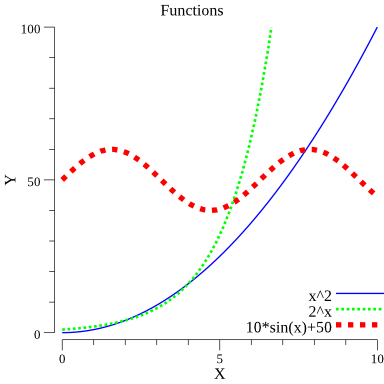

In [16]:
{
    p, err := plot.New()
    if err != nil {
        panic(err)
    }
    p.Title.Text = "Functions"
    p.X.Label.Text = "X"
    p.Y.Label.Text = "Y"

    // quadratic function x^2
    quad := plotter.NewFunction(func(x float64) float64 { return x * x })
    quad.Color = color.RGBA{B: 255, A: 255}

    // exponential function 2^x
    exp := plotter.NewFunction(func(x float64) float64 { return math.Pow(2, x) })
    exp.Dashes = []vg.Length{vg.Points(2), vg.Points(2)}
    exp.Width = vg.Points(2)
    exp.Color = color.RGBA{G: 255, A: 255}

    // sine function, shifted and scaled
    sin := plotter.NewFunction(func(x float64) float64 { return 10*math.Sin(x) + 50 })
    sin.Dashes = []vg.Length{vg.Points(4), vg.Points(5)}
    sin.Width = vg.Points(4)
    sin.Color = color.RGBA{R: 255, A: 255}

    // functions and legend
    p.Add(quad, exp, sin)
    p.Legend.Add("x^2", quad)
    p.Legend.Add("2^x", exp)
    p.Legend.Add("10*sin(x)+50", sin)
    p.Legend.ThumbnailWidth = vg.Inch*0.5

    // Set the axis ranges
    p.X.Min = 0
    p.X.Max = 10
    p.Y.Min = 0
    p.Y.Max = 100

    displayPlot(p)
}

In [7]:
{
    // Initialize two matrices, a and b.
    a := mat.NewDense(2, 2, []float64{
        4, 0,
        0, 4,
    })
    b := mat.NewDense(2, 3, []float64{
        4, 0, 0,
        0, 0, 4,
    })

    // Take the matrix product of a and b and place the result in c.
    var c mat.Dense
    c.Mul(a, b)

    // Print the result using the formatter.
    fc := mat.Formatted(&c, mat.Prefix("    "), mat.Squeeze())
    fmt.Printf("c = %v\n", fc)
}

c = ⎡16  0   0⎤
    ⎣ 0  0  16⎦


## Stat

In [15]:
import (
    "gonum.org/v1/gonum/stat"
    "sort"
)

values := []float64{1, 2, 3, 4, 5, 6}
weights := []float64{1, 1, 1, 1, 1, 1}
fmt.Printf("mean: %v\n", stat.Mean(values, weights))

// using sort
values = []float64{10, 20, 25, 30, 45, 70, 30}
sort.Float64s(values) //sorts the float
fmt.Printf("quantile: %v\n", stat.Quantile(0.5, stat.Empirical, values, nil))

mean: 3.5
quantile: 30
13
<nil>


## Matrix

In [23]:
func null(){
    matrix := mat.NewDense(3, 3, nil)
    fmt.Println(*matrix)
}

null()

{{3 3 [0 0 0 0 0 0 0 0 0] 3} 3 3}


In [26]:
func format(matrix mat.Matrix) {
    formatted := mat.Formatted(matrix, mat.Prefix(""), mat.Squeeze())
    fmt.Println(formatted)
}
m := mat.NewDense(6, 3, nil)
format(m)

⎡0  0  0⎤
⎢0  0  0⎥
⎢0  0  0⎥
⎢0  0  0⎥
⎢0  0  0⎥
⎣0  0  0⎦


In [28]:
func retriever(){
    m := mat.NewDense(6, 3, nil)
    getElement := m.At(1, 2)
    fmt.Println(getElement)
}

retriever()

0


In [30]:
func exampleCol() {
    // This example copies the second column of a matrix into col, allocating a new slice of float64.
    m := mat.NewDense(3, 3, []float64{
        2.0, 9.0, 3.0,
        4.5, 6.7, 8.0,
        1.2, 3.0, 6.0,
    })

    col := mat.Col(nil, 1, m)

    fmt.Printf("col = %#v", col)
}

func exampleRow() {
    // This example copies the third row of a matrix into row, allocating a new slice of float64.
    m := mat.NewDense(3, 3, []float64{
        2.0, 9.0, 3.0,
        4.5, 6.7, 8.0,
        1.2, 3.0, 6.0,
    })

    row := mat.Row(nil, 2, m)

    fmt.Printf("row = %#v", row)
}

In [31]:
exampleCol()

col = []float64{9, 6.7, 3}

In [32]:
exampleRow()

row = []float64{1.2, 3, 6}